In [2]:
#Dependencies
import sqlalchemy
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

#for connecting to postgres
import psycopg2
from config import conn_string

#for plotting
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#had to install psycopg2
#Connecting to Postgres with Python section of 
#https://www.learndatasci.com/tutorials/using-databases-python-postgres-sqlalchemy-and-alembic/

engine = create_engine(conn_string)

In [4]:
#Set up Base to read tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['titles', 'employees', 'departments', 'salaries']

In [6]:
#set each table as a Class
Titles = Base.classes.titles
Employees = Base.classes.employees
Departments = Base.classes.departments
Salaries = Base.classes.salaries

In [7]:
#open session
session = Session(bind=engine)

In [8]:
#set up inspector to read tables & columns
inspector = inspect(engine)
inspector.get_table_names()

['titles', 'employees', 'dept_emp', 'departments', 'dept_manager', 'salaries']

In [9]:
#column names for employees table
columns = inspector.get_columns('employees')
for column in columns:
    print(column["name"], column["type"])

emp_no INTEGER
emp_title_id VARCHAR(5)
birth_date VARCHAR(10)
first_name VARCHAR
last_name VARCHAR
sex VARCHAR(1)
hire_date VARCHAR(10)


In [10]:
#column names for titles table

columns = inspector.get_columns('titles')
for column in columns:
    print(column["name"], column["type"])

title_id VARCHAR(5)
title VARCHAR(20)


In [11]:
#column names for salaries table

columns = inspector.get_columns('salaries')
for column in columns:
    print(column["name"], column["type"])

emp_no INTEGER
salary INTEGER


In [12]:
#get list of salaries for histogram
sql_salary = session.query(Salaries.salary)

sql_salary_list = []
for record in sql_salary:
    sql_salary_list.append(record)

In [13]:
type(sql_salary_list)

list

In [14]:
sql_salary_series = pd.Series(sql_salary_list)

In [15]:
type(sql_salary_series)

pandas.core.series.Series

KeyboardInterrupt: 

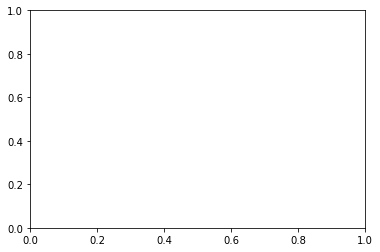

In [16]:
plt.hist(sql_salary_series)

In [17]:
plt.hist(sql_salary_series)

plt.title('Salary Distribution at Pewlett Hackard')
plt.xlim(38000,115000)
plt.xlabel('Salary in 1000s USD')
plt.ylabel('Number of Employees')

plt.savefig('Salary_Dist.png')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000022B53C34430> (for post_execute):


KeyboardInterrupt: 

In [ ]:
session.close()

Pandas Method

In [18]:
salaries_df = pd.read_csv("data/salaries.csv")
titles_df = pd.read_csv('data/titles.csv')
employees_df = pd.read_csv('data/employees.csv')

In [19]:
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [20]:
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [21]:
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [23]:
emp_salary_df = employees_df.merge(salaries_df, how='inner', on='emp_no')

In [24]:
emp_salary_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000


In [30]:
titles_df_renamed = titles_df.rename(columns={'title_id':'emp_title_id'})

In [31]:
combined_df = emp_salary_df.merge(titles_df_renamed, how='inner', on='emp_title_id')

In [32]:
combined_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff


In [33]:
combined_df.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [ ]:
#Create a histogram to visualize the most common salary ranges for employees.

In [ ]:
import matplotlib.pyplot as plt

In [58]:
salary_list = combined_df['salary']

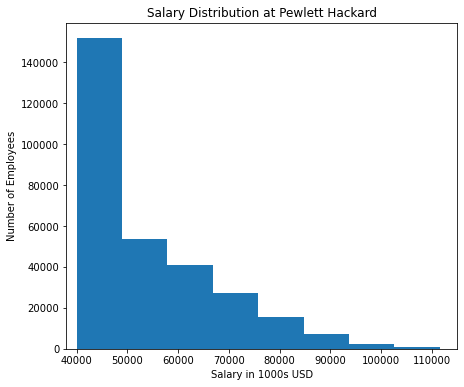

In [70]:
plt.figure(figsize=(7, 6))
plt.hist(salary_list)

plt.title('Salary Distribution at Pewlett Hackard')
plt.xlim(38000,115000)
plt.xlabel('Salary in 1000s USD')
plt.ylabel('Number of Employees')

plt.savefig('Salary_Dist.png')

In [34]:
#Create a bar chart of average salary by title.
st_df = combined_df[['salary','title']]
mean_salary= st_df.groupby('title').mean()
salaries = mean_salary['salary']

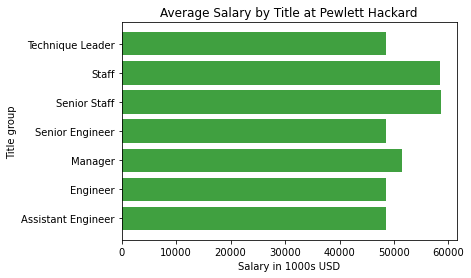

In [55]:
plt.barh(mean_salary.index, salaries, color='green', alpha=0.75)
plt.title('Average Salary by Title at Pewlett Hackard')
plt.xlabel("Salary in 1000s USD")
plt.ylabel('Title group')

plt.savefig('AvgSalary_byTitle.png')